In [151]:
import pandas as pd

In [152]:
df = pd.read_csv('housepricedata.csv')

In [153]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [154]:
dataset = df.values

In [155]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [156]:
X = dataset[:,0:10]

In [157]:
Y = dataset[:,10]

In [158]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [159]:
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaled, Y, test_size = 0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [161]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [162]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [163]:
hist = model.fit(X_train, Y_train, 
                batch_size=32, epochs=100,
                validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 720us/step - loss: 0.6906 - accuracy: 0.4932 - val_loss: 0.6847 - val_accuracy: 0.5068
Epoch 2/100
1022/1022 [==============================] - 0s 73us/step - loss: 0.6837 - accuracy: 0.4932 - val_loss: 0.6801 - val_accuracy: 0.5068
Epoch 3/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.6789 - accuracy: 0.4932 - val_loss: 0.6764 - val_accuracy: 0.5114
Epoch 4/100
1022/1022 [==============================] - 0s 86us/step - loss: 0.6744 - accuracy: 0.4951 - val_loss: 0.6727 - val_accuracy: 0.5525
Epoch 5/100
1022/1022 [==============================] - 0s 82us/step - loss: 0.6695 - accuracy: 0.6370 - val_loss: 0.6683 - val_accuracy: 0.7032
Epoch 6/100
1022/1022 [==============================] - 0s 85us/step - loss: 0.6645 - accuracy: 0.7456 - val_loss: 0.6644 - val_accuracy: 0.7397
Epoch 7/100
1022/1022 [==============================] - 0s 73us/step - loss

1022/1022 [==============================] - 0s 64us/step - loss: 0.3070 - accuracy: 0.8796 - val_loss: 0.3924 - val_accuracy: 0.8082
Epoch 57/100
1022/1022 [==============================] - 0s 57us/step - loss: 0.3058 - accuracy: 0.8855 - val_loss: 0.3784 - val_accuracy: 0.8311
Epoch 58/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.3040 - accuracy: 0.8836 - val_loss: 0.3739 - val_accuracy: 0.8311
Epoch 59/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.3023 - accuracy: 0.8777 - val_loss: 0.3719 - val_accuracy: 0.8219
Epoch 60/100
1022/1022 [==============================] - 0s 62us/step - loss: 0.3006 - accuracy: 0.8845 - val_loss: 0.3750 - val_accuracy: 0.8265
Epoch 61/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.2999 - accuracy: 0.8836 - val_loss: 0.3761 - val_accuracy: 0.8265
Epoch 62/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.2975 - accuracy: 0.8836 - val_loss: 0.3730 - val_a

In [164]:
model.evaluate(X_test, Y_test)

219/219 [==============================] - 0s 61us/step


[0.24652084572130142, 0.913241982460022]

<function matplotlib.pyplot.show(close=None, block=None)>

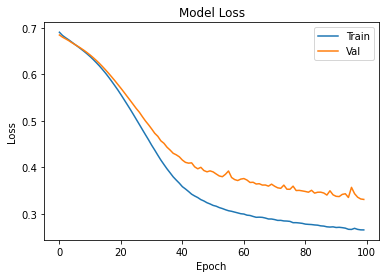

In [165]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

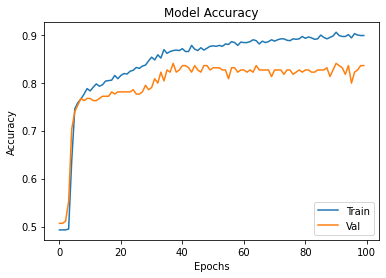

In [166]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show